## Homework 4

In [31]:
## Importing Libraries

from  modules.LinearRegression import LinearRegression
from modules.RidgeRegression import RidgeRegression
import numpy as np 

# load datasets and libraries to data split
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time
import time

In [20]:
## Generate Dataset


## Experiment 1. Adjust Linear and Ridge Ression without Standarizar values


R^2: 0.9131254977291062
Mean Squared Error: 26.974979674789935
R^2 Ridge: 0.9131283
Mean Squared Error Ridge: 26.9741


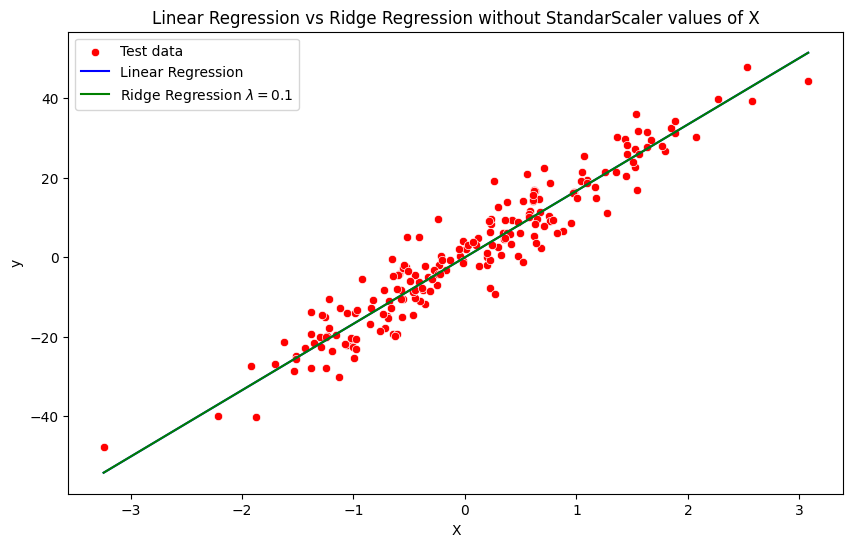

In [21]:
# Split the data into training and test sets
X, y = make_regression(n_samples=1000, n_features=1, noise=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R^2 and Mean Squared Error
r = lin_reg.score(X_test,y_test) 
print("R^2:", r)

mse = lin_reg.mean_squared_error(X_test,y_test) 
print("Mean Squared Error:", mse)

lambda_=0.1
ridge_regression = RidgeRegression(lambda_=lambda_)
ridge_regression.fit(X_train, y_train)
y_pred_ridge = ridge_regression.predict(X_test)

# Calculate R^2 and Mean Squared Error
r_ridge = ridge_regression.score(X_test,y_test)
print("R^2 Ridge:", r_ridge)

mse_ridge = ridge_regression.mean_squared_error(X_test,y_test)
print("Mean Squared Error Ridge:", mse_ridge)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(),color='red', label='Test data')
sns.lineplot(x=X_test.squeeze(), y=y_pred.squeeze(),color='blue',  label='Linear Regression')
sns.lineplot(x=X_test.squeeze(), y=y_pred_ridge.squeeze(),color='green',  label=f'Ridge Regression $\\lambda ={lambda_}$')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression vs Ridge Regression without StandarScaler values of X')
plt.savefig('1-Linear_vs_Ridge_Regression.png')
plt.show()



## Experiment 2 Linear and Ridge Regression with Standarizer Values

R^2: 0.9131254977291062
Mean Squared Error: 0.09258183125693803
R^2 Ridge: 0.91307926
Mean Squared Error Ridge: 0.09263114


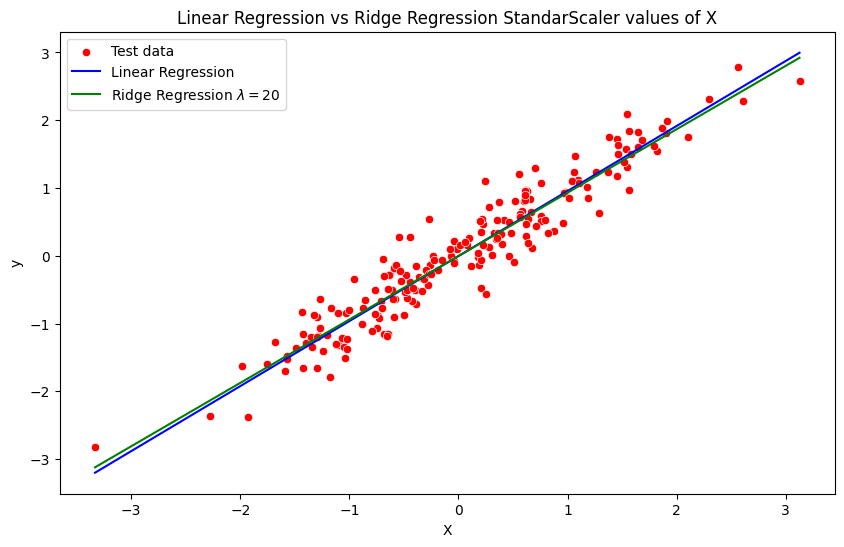

In [38]:

# Generate some random regression data
X, y = make_regression(n_samples=1000, n_features=1, noise=5, random_state=42)
# Create a StandardScaler instance
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R^2 and Mean Squared Error
r = lin_reg.score(X_test,y_test) 
print("R^2:", r)

mse = lin_reg.mean_squared_error(X_test,y_test) 
print("Mean Squared Error:", mse)



lambda_=20
ridge_regression = RidgeRegression(lambda_=lambda_)
ridge_regression.fit(X_train, y_train)
y_pred_ridge = ridge_regression.predict(X_test)

# Calculate R^2 and Mean Squared Error
r_ridge = ridge_regression.score(X_test,y_test)
print("R^2 Ridge:", r_ridge)

mse_ridge = ridge_regression.mean_squared_error(X_test,y_test)
print("Mean Squared Error Ridge:", mse_ridge)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(),color='red', label='Test data')
sns.lineplot(x=X_test.squeeze(), y=y_pred.squeeze(),color='blue',  label='Linear Regression')
sns.lineplot(x=X_test.squeeze(), y=y_pred_ridge.squeeze(),color='green',  label=f'Ridge Regression $\\lambda ={lambda_}$')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression vs Ridge Regression StandarScaler values of X')
plt.savefig('3-Linear_vs_Ridge_Regression.png')
plt.show()
